In [6]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 创建数据
train_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\train"
validation_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\validation"
test_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\test"

# 数据增强
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  rotation_range = 40, 
                                  width_shift_range = 0.2, 
                                  height_shift_range = 0.2, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest")
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = "binary")

common_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = common_datagen.flow_from_directory(validation_dir,
                                                         target_size = (150, 150),
                                                         batch_size = 20,
                                                         class_mode = "binary")
test_generator = common_datagen.flow_from_directory(test_dir,
                                    target_size = (150, 150),
                                    batch_size = 20,
                                    class_mode = "binary")

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
conv_base = VGG16(weights = "imagenet", include_top = False, input_shape = (150, 150, 3))

# 搭建模型
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 冻结conv_base的权重，不参与反向传播
conv_base.trainable = False

# 编译模型
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

# 运行模型
history = model.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs = 30,
                   validation_data = validation_generator,
                   validation_steps = 50,
                    verbose = 1)

# 测试模型
score = model.evaluate_generator(test_generator,
                                steps = 50,
                                verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 23s 230ms/step - loss: 1.1538 - acc: 0.6830 - val_loss: 0.4234 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 20s 200ms/step - loss: 0.5058 - acc: 0.7695 - val_loss: 0.3401 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4497 - acc: 0.7825 - val_loss: 0.3071 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4160 - acc: 0.8090 - val_loss: 0.3506 - val_acc: 0.8290
Epoch 5/30
100/100 [==============================] - 20s 197ms/step - loss: 0.4074 - acc: 0.8165 - val_loss: 0.2998 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 20s 198ms/step - loss: 0.4082 - acc: 0.8210 - val_loss: 0.2632 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 20s 196ms/step - loss: 0.4053 - acc: 0.8135 - val_loss: 0.3648 - val_acc: 0.8560
Epoch 8

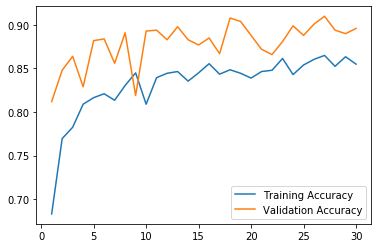

In [12]:
# 绘制结果
plt.figure()
epoch = [i for i in range(1, len(history.history["acc"]) + 1)]
plt.plot(epoch, history.history["acc"], label = "Training Accuracy")
plt.plot(epoch, history.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

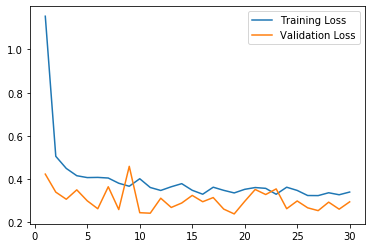

In [13]:
plt.figure()
plt.plot(epoch, history.history["loss"], label = "Training Loss")
plt.plot(epoch, history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In [14]:
model.save(r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\dogs-vs-cats-model.h5")